# Ad Campaign Effect in Wikipedia pages

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
df = pd.read_csv('Dataset/train_1.csv')

In [3]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
df.tail(20)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
145043,2091_(serie_de_televisión)_es.wikipedia.org_al...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,7.0,3.0,4.0,4.0,2.0,4.0,5.0,2.0,2.0
145044,Campeonato_Sudamericano_de_Fútbol_Sub-20_de_20...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,8.0,20.0,27.0,11.0,7.0,17.0,13.0,40.0
145045,Split_(película)_es.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
145046,Huracán_Matthew_es.wikipedia.org_all-access_sp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,4.0,4.0,6.0,5.0,5.0,13.0,7.0,11.0,7.0
145047,Fences_(película)_es.wikipedia.org_all-access_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,3.0,10.0,1.0,6.0,22.0,34.0,1.0,3.0,29.0
145048,Logan_(película)_es.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.0,25.0,7.0,5.0,8.0,25.0,2.0,8.0,3.0,1.0
145049,La_doña_(telenovela_de_2016)_es.wikipedia.org_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,35.0,10.0,3.0,4.0,1.0,31.0,27.0,9.0,135.0
145050,RTS_(canal_de_televisión)_es.wikipedia.org_all...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,7.0,2.0,3.0,2.0,18.0,40.0,1.0,42.0
145051,La_ley_del_corazón_es.wikipedia.org_all-access...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,74.0,222.0,2.0,16.0,21.0,7.0,34.0,37.0,42.0
145052,The_Crown_(serie_de_televisión)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,83.0,44.0,36.0,9.0,4.0,17.0,6.0,11.0,5.0


In [5]:
# SHape of data
df.shape

(145063, 551)

In [6]:
# Check the characteristics of the data
df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [8]:
# Check the missing values across the dates
df.isnull().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [9]:
# Check the pattern of null values
null_values_pattern = df.isnull().sum().values

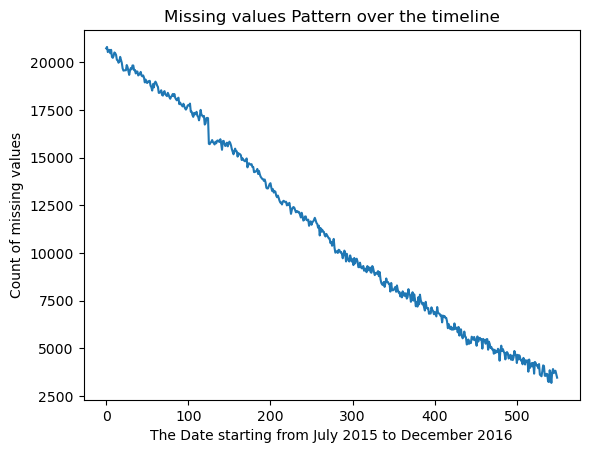

In [10]:
# We have plotted the null values starting from 1:, because 0 has Pages values which is not relevant to us
plt.plot(null_values_pattern[1:])
plt.xlabel("The Date starting from July 2015 to December 2016")
plt.ylabel("Count of missing values")
plt.title("Missing values Pattern over the timeline")
plt.show()

    - The oldest date has the maximum number of no page visits. That is, many pages might have come up after the initial days.
    - As the days progressed the number of hits also became more with passing days
    - By end of 2016 most of the pages had atleast more than one visits

In [11]:
# Check the missing values across the pages
df.isnull().sum(axis=1)

0           0
1           0
2           0
3           0
4         291
         ... 
145058    544
145059    550
145060    550
145061    550
145062    550
Length: 145063, dtype: int64

In [12]:
null_values_pattern = df.isnull().sum(axis=1).values

In [13]:
# Storing the Null values of each page in the series
df['Page_null'] = null_values_pattern

In [14]:
df.tail()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Page_null
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0,544
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550
145062,Francisco_el_matemático_(serie_de_televisión_d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550


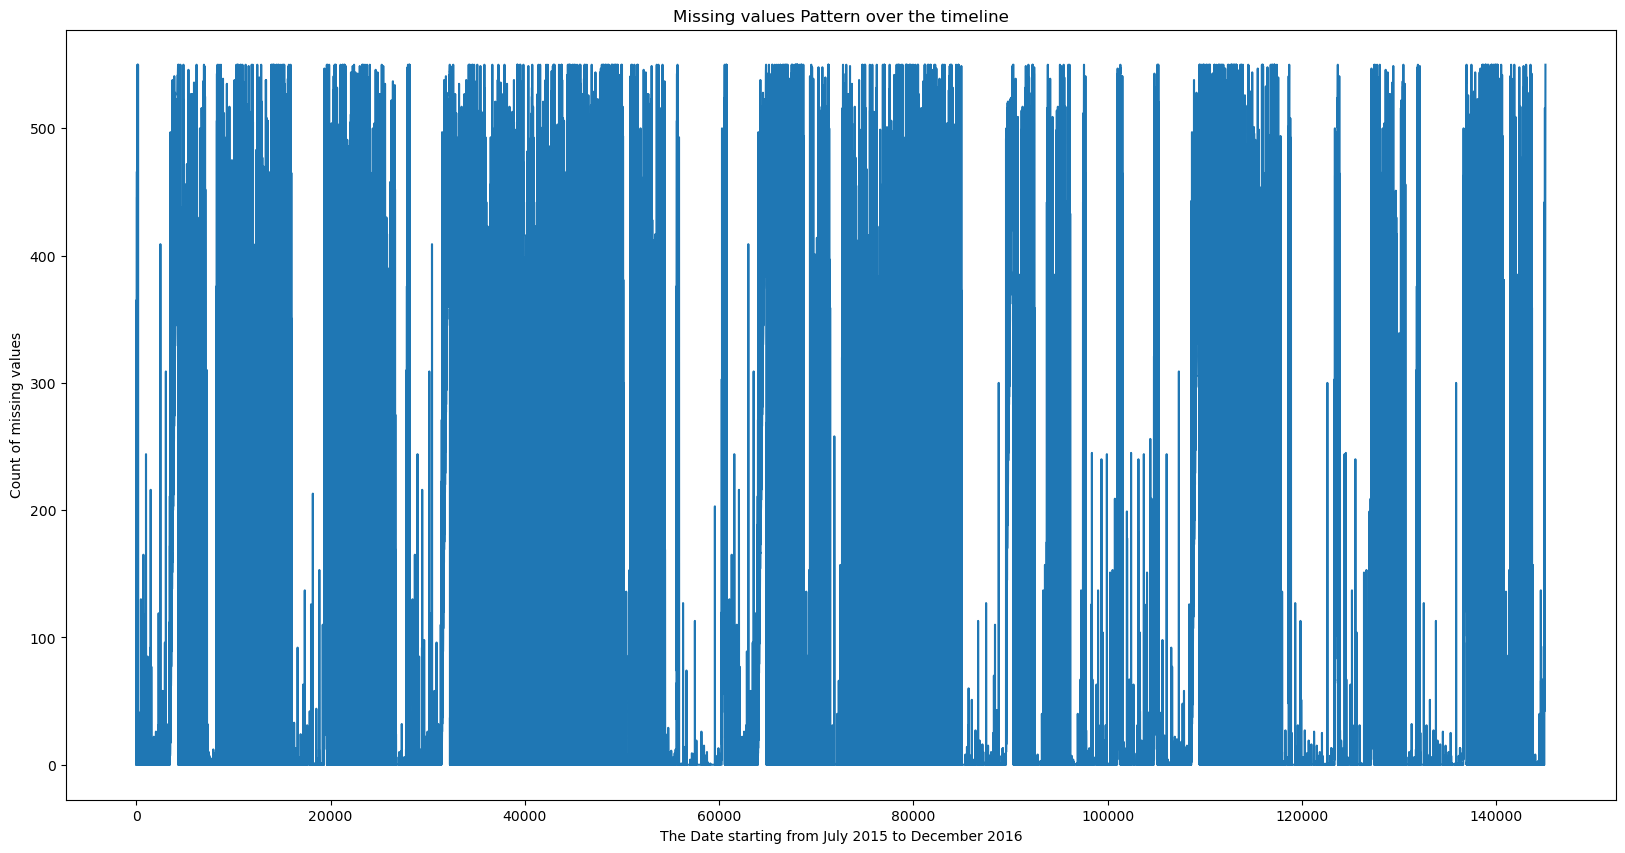

In [15]:
# We have plotted the null values starting from 1:, because 0 has Pages values which is not relevant to us
plt.figure(figsize=(20,10))
plt.plot(null_values_pattern)
plt.xlabel("The Date starting from July 2015 to December 2016")
plt.ylabel("Count of missing values")
plt.title("Missing values Pattern over the timeline")
plt.show()

    - Most of the pages have more than 400 days of missing values

In [16]:
# Trying to figure out the pages with No Null Click values
df[df.Page_null==0]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Page_null
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144944,Chichén_Itzá_es.wikipedia.org_all-access_spider,8.0,13.0,19.0,14.0,6.0,5.0,10.0,9.0,5.0,...,18.0,12.0,6.0,5.0,14.0,10.0,174.0,8.0,19.0,0
144945,Fecundación_es.wikipedia.org_all-access_spider,29.0,16.0,6.0,11.0,33.0,4.0,11.0,16.0,10.0,...,8.0,13.0,3.0,6.0,10.0,16.0,10.0,7.0,8.0,0
144946,Gran_Hermano_VIP_(España)_es.wikipedia.org_all...,4.0,25.0,7.0,11.0,6.0,6.0,16.0,11.0,23.0,...,299.0,46.0,5.0,11.0,77.0,523.0,110.0,171.0,43.0,0
144947,Modelo_atómico_de_Thomson_es.wikipedia.org_all...,0.0,2.0,6.0,6.0,7.0,5.0,4.0,6.0,7.0,...,1.0,5.0,11.0,9.0,11.0,6.0,7.0,9.0,4.0,0


In [17]:
# Number of pages with NAN values
print(f"Data points(Pages) with missing values = {round((df[df.Page_null!=0].shape[0])/df.shape[0]*100,2)}%")

Data points(Pages) with missing values = 19.15%


In [18]:
# Pages with no click data
df[df.Page_null==550]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Page_null
117,Pristin_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550
148,TWICEcoaster:_LANE_2_zh.wikipedia.org_all-acce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550
174,Yuri!!!_on_ICE_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550
4282,陳宣儒_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550
4283,驚心動魄_(2000年電影)_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143523,Hidden_Figures_es.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550


In [19]:
# Checking the data with all null values, i.e., No click data
print(f"Pages with no click data at all = {round(df[df.Page_null==550].shape[0]/df.shape[0]*100,2)}%")

Pages with no click data at all = 0.45%


In [20]:
# Dropping these pages
index_drop = df[df.Page_null==550].index

In [21]:
# Dropping the pages with no click values at all
df.drop(index_drop, inplace=True)

In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Page_null
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,291


In [24]:
# Percentage of the pages with more than 400 days of missing data
print(f"Percentage of pages with more than 400 days of missing data = {round(df[df.Page_null>400].shape[0]/df.shape[0]*100,2)}%")

Percentage of pages with more than 400 days of missing data = 3.41%


In [25]:
# Dropping these values
index_drop = df[df.Page_null>400].index
df.drop(index_drop, inplace=True)

In [26]:
df.reset_index(drop=True, inplace=True)

In [27]:
# Shape of dataframe now
print(f"Shape of dataframe now = {df.shape}")

Shape of dataframe now = (139480, 552)


In [28]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Page_null
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,291


In [29]:
# Checking the value distribution of the click count
df.loc[4].values

array(['52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider', nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

    -> The pages with missing click data usually have data towards the latest dates (2016 end)
    -> Missing placeholders are towards the beginning and data is present towards the end

In [30]:
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27',
       '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31', 'Page_null'],
      dtype='object', length=552)

In [31]:
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Page_null
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139475,Winifer_Fernández_es.wikipedia.org_all-access_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,0.0,2.0,4.0,2.0,4.0,6.0,4.0,1.0,383
139476,Cazafantasmas_(película_de_2016)_es.wikipedia....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,1.0,3.0,1.0,3.0,1.0,0.0,1.0,2.0,342
139477,Anexo:Tenis_en_los_Juegos_Olímpicos_de_Río_de_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,2.0,6.0,4.0,1.0,7.0,1.0,2.0,2.0,369
139478,Un_monstruo_viene_a_verme_(película)_es.wikipe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,1.0,8.0,7.0,2.0,6.0,12.0,3.0,15.0,379


In [32]:
# Dropping the Page_null column
df.drop(columns='Page_null', axis=1, inplace=True)

In [33]:
# # Impute with 0
# df = df.fillna(0)

In [34]:
# Using linear interpolation to fill in missing values
# We will be using linear interpolation to fill the missing values
df.loc[:,'2015-07-01':] = df.loc[:,'2015-07-01':].interpolate(method='linear', limit_direction='both', axis=1)

In [35]:
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139475,Winifer_Fernández_es.wikipedia.org_all-access_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,2.0,4.0,2.0,4.0,6.0,4.0,1.0
139476,Cazafantasmas_(película_de_2016)_es.wikipedia....,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,2.0,4.0,1.0,3.0,1.0,3.0,1.0,0.0,1.0,2.0
139477,Anexo:Tenis_en_los_Juegos_Olímpicos_de_Río_de_...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,3.0,5.0,2.0,6.0,4.0,1.0,7.0,1.0,2.0,2.0
139478,Un_monstruo_viene_a_verme_(película)_es.wikipe...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,11.0,5.0,1.0,8.0,7.0,2.0,6.0,12.0,3.0,15.0


In [36]:
# The pages which are not from wikipedia.org, deleting those records
index_drop = df[~(df['Page'].str.contains(".wikipedia.org"))].index
df.drop(index_drop, inplace=True)

In [37]:
# Resetting the index
df.reset_index(drop=True, inplace=True)

In [38]:
# Extracting the Language from the Page
df['Language'] = df['Page'].apply(lambda x: x.split(".wikipedia.org")[0].split('_')[-1])

In [39]:
df.shape

(123261, 552)

In [40]:
# The Unique languages
df.Language.unique()

array(['zh', 'fr', 'en', 'ru', 'de', 'ja', 'es'], dtype=object)

In [41]:
# Get the 'specific name'/'title'
df['Title'] = df.Page.apply(lambda x: "_".join(x.split('.wikipedia.org')[0].split('_')[:-1]))

In [42]:
# Get the access_type
df['Access_Type'] = df.Page.apply(lambda x: x.split("wikipedia.org_")[-1].split("_")[0])

In [43]:
# Get the access_origin
df['Access_Origin'] = df.Page.apply(lambda x: x.split("wikipedia.org_")[-1].split("_")[-1])

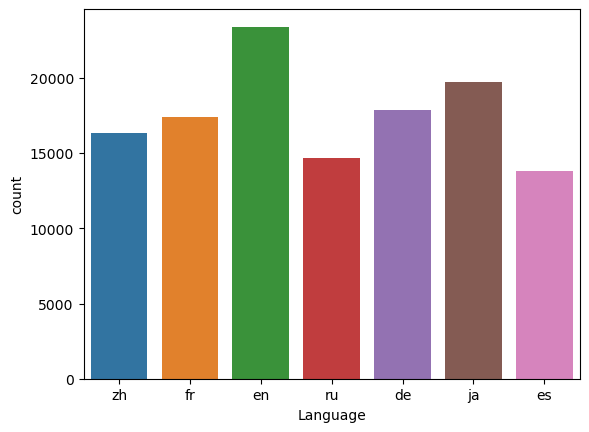

In [44]:
# Plot the count plot of the distribution of language of the pages
sns.countplot(df, x='Language', hue = 'Language')
plt.show()

    -> Maximum pages are in English (en) language
    -> Japanese (ja) is the second highest langugae
    -> Germany (de) is the third highest labguage, followed by French (fr) and Mandarin (zh-Chinese)

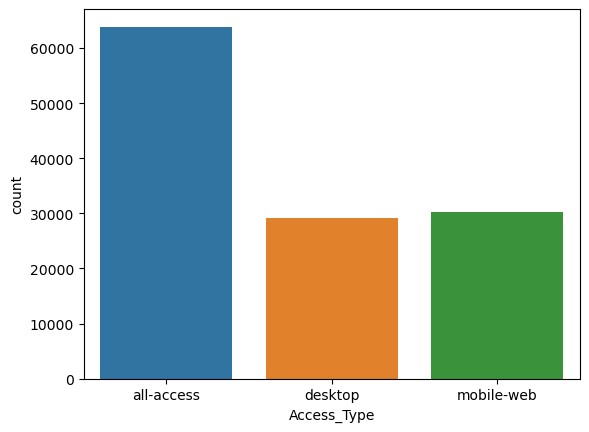

In [45]:
# Plot the count plot of the distribution of Access type of the pages
sns.countplot(df, x='Access_Type', hue = 'Access_Type')
plt.show()

    -> All-Access is the highest type of access for the web pages
    -> Mobile/Web is the second highest type of access
    -> Desktop access is the least type of access

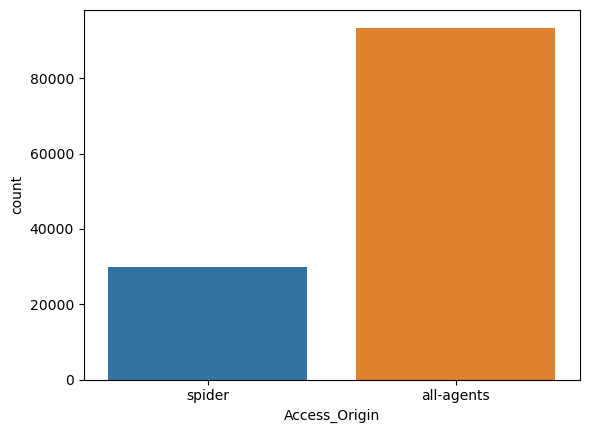

In [46]:
# Plot the count plot of the distribution of Access Origin of the pages
sns.countplot(df, x='Access_Origin', hue = 'Access_Origin')
plt.show()

    -> All agents is the highest form of access origin for the web-page
    -> Spider is the least form of access origin

### Aggregating & Pivoting

In [47]:
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
       '2016-12-31', 'Language', 'Title', 'Access_Type', 'Access_Origin'],
      dtype='object', length=555)

In [48]:
# Storing the aggregated Data in new DataFrame
df_lang = pd.DataFrame()
# Grouping on language and Aggregating on mean
df_lang = df.iloc[:,1:-3].groupby('Language').mean().round(2)

In [49]:
df_lang

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Language,,,,,,,,,,,,,,,,,,,,,
de,807.73,797.64,768.21,710.38,815.11,890.55,865.62,877.31,847.06,793.90,...,843.99,854.38,833.10,1317.96,1235.74,1098.36,1051.35,1013.67,968.51,918.03
en,3894.56,3882.84,3700.32,3841.15,3958.04,4240.49,4028.06,3816.17,3898.09,3877.60,...,5093.32,4766.77,5066.17,5254.38,5902.59,6175.98,5989.52,6383.59,5308.78,5188.48
es,1131.52,1082.38,997.27,937.62,1017.68,1156.62,1127.91,1095.35,1075.11,979.46,...,989.23,943.05,888.64,912.28,1205.49,1140.83,1186.05,1119.50,823.97,790.88
fr,523.33,526.45,507.68,539.93,530.78,551.41,534.24,525.11,520.02,492.86,...,657.36,644.14,623.84,674.32,948.18,867.84,781.10,759.44,707.85,652.97
ja,627.87,716.97,650.27,810.02,778.11,681.44,663.61,659.76,643.80,667.86,...,688.75,988.22,875.58,836.19,796.13,806.75,808.05,886.32,976.21,1224.59
ru,713.36,724.50,676.59,640.51,677.35,724.33,709.32,706.31,721.81,816.45,...,903.53,893.35,882.64,1117.29,1117.89,1008.88,938.20,904.34,809.93,891.21
zh,297.96,298.33,296.61,299.03,316.01,317.42,317.04,324.09,322.35,333.18,...,335.48,332.11,348.04,367.53,366.40,365.95,370.08,344.77,348.14,352.84


In [50]:
# Changing the dataframe index to Date before pivoting 
df_lang.index.name = 'Date'

In [51]:
# Pivoting/Transposing the DataFrame
df_lang = df_lang.T

In [52]:
df_lang.index = pd.to_datetime(df_lang.index)

In [53]:
df_lang

Date,de,en,es,fr,ja,ru,zh
2015-07-01,807.73,3894.56,1131.52,523.33,627.87,713.36,297.96
2015-07-02,797.64,3882.84,1082.38,526.45,716.97,724.50,298.33
2015-07-03,768.21,3700.32,997.27,507.68,650.27,676.59,296.61
2015-07-04,710.38,3841.15,937.62,539.93,810.02,640.51,299.03
2015-07-05,815.11,3958.04,1017.68,530.78,778.11,677.35,316.01
...,...,...,...,...,...,...,...
2016-12-27,1098.36,6175.98,1140.83,867.84,806.75,1008.88,365.95
2016-12-28,1051.35,5989.52,1186.05,781.10,808.05,938.20,370.08
2016-12-29,1013.67,6383.59,1119.50,759.44,886.32,904.34,344.77
2016-12-30,968.51,5308.78,823.97,707.85,976.21,809.93,348.14


### Plotting the language-wise data

In [54]:
# Import the adfuller test from statsmodels
from statsmodels.tsa.stattools import adfuller

# Importing this library for decomposition
import statsmodels.api as sm

In [55]:
# Augmented Dickey-Fuller (ADF) to check for the stationarity of Data
def adf_test(data, language):
    p_value = adfuller(data)[1]
    if p_value<=0.05:
        return f"{language} Data is Stationary"
    else:
        return f"{language}Data is not Stationary"

In [56]:
# Function to plot the language timeseries Data
def plot_langauge_series(data, lang):
    data.plot();
    plt.title(f"Timeseries representation of {lang} Language webpages")
    plt.show()

#### English Language Web Pages

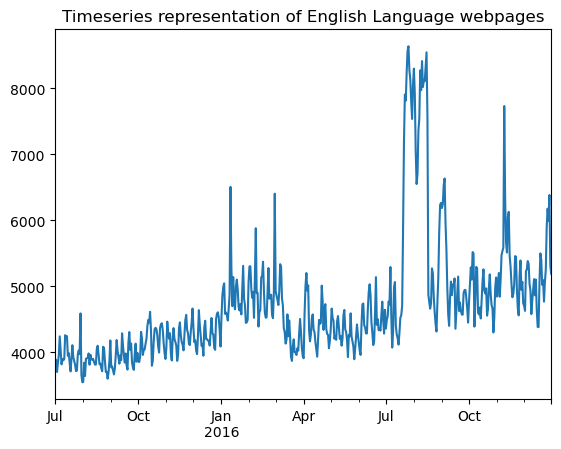

In [57]:
# Plot the data from "English" (en) Language
plot_langauge_series(df_lang.en, 'English')

In [58]:
# Check the stationarity of the English language based webpages
print(f"English Timeseries {adf_test(df_lang.en, 'English')}")

English Timeseries EnglishData is not Stationary


    -> There is a rising trend in the english language based webpages

In [59]:
# Decomposing the components of english in trend and seasonality
model = sm.tsa.seasonal_decompose(df_lang['en'], model = 'additive')

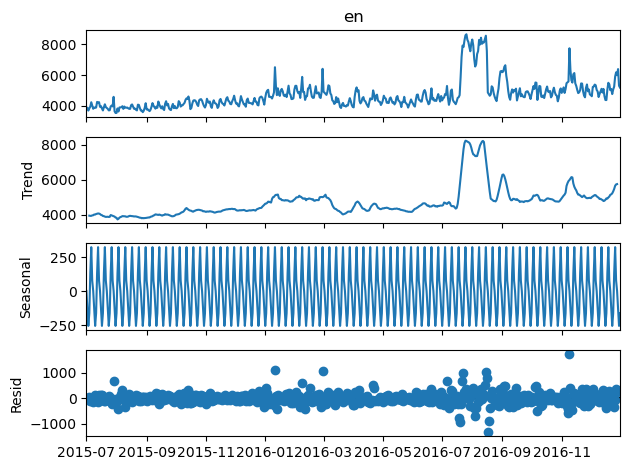

In [60]:
model.plot();

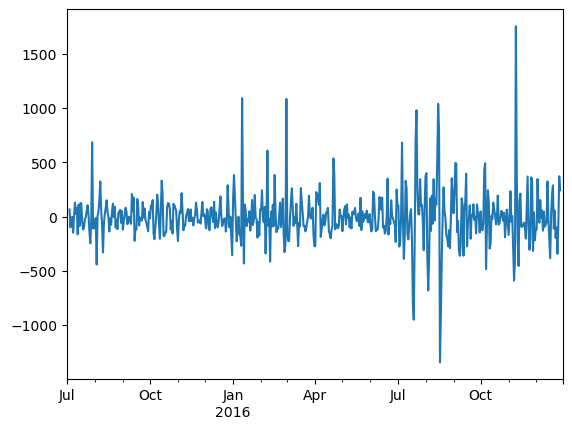

In [61]:
# Residual plot for English Language
model.resid.plot();

#### Japanese Language Based Web Pages

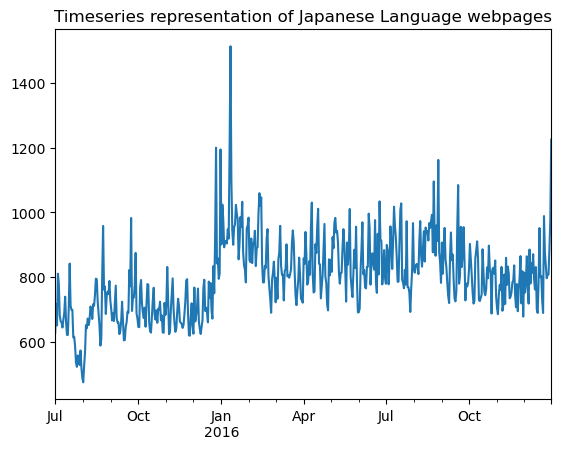

In [62]:
# Plot the data from "Japanse" (ja) Language
plot_langauge_series(df_lang.ja, 'Japanese')

In [63]:
# Check the stationarity of the English language based webpages
print(f"Japanese Timeseries {adf_test(df_lang.ja, 'Japanese')}")

Japanese Timeseries JapaneseData is not Stationary


    -> There is a rising trend in the Japanese language based webpages and also seasonality component is present

In [64]:
# Decomposing the components of Japanese in trend and seasonality
model = sm.tsa.seasonal_decompose(df_lang['ja'], model = 'additive')

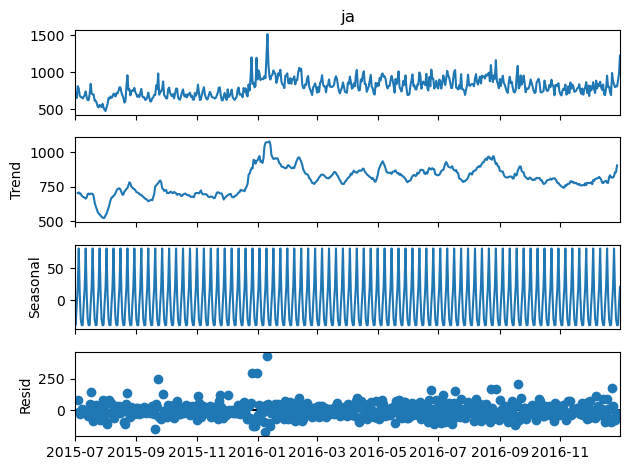

In [65]:
model.plot();

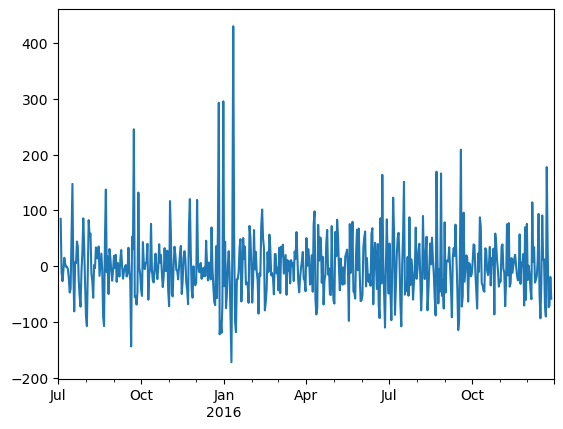

In [66]:
# Residual plot for Japanese Language
model.resid.plot();

#### German Language Web Pages

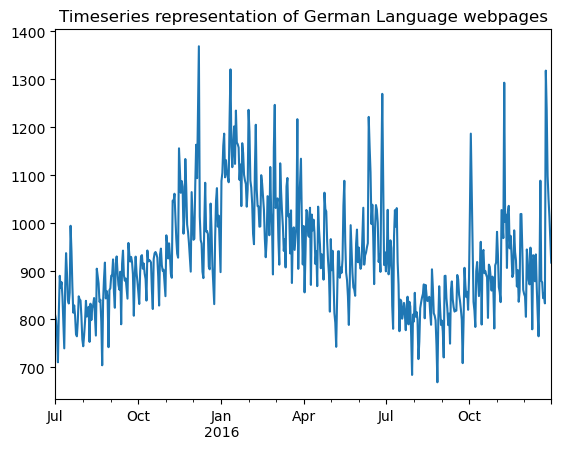

In [67]:
# Plot the data from "German" (de) Language
plot_langauge_series(df_lang.de, 'German')

In [68]:
# Check the stationarity of the German language based webpages
print(f"German Timeseries {adf_test(df_lang.de, "German")}")

German Timeseries GermanData is not Stationary


    -> There is a rising trend, then decreasing trend and then rising in the German language based webpages

In [69]:
# Decomposing the components of German in trend and seasonality
model = sm.tsa.seasonal_decompose(df_lang['de'], model = 'additive')

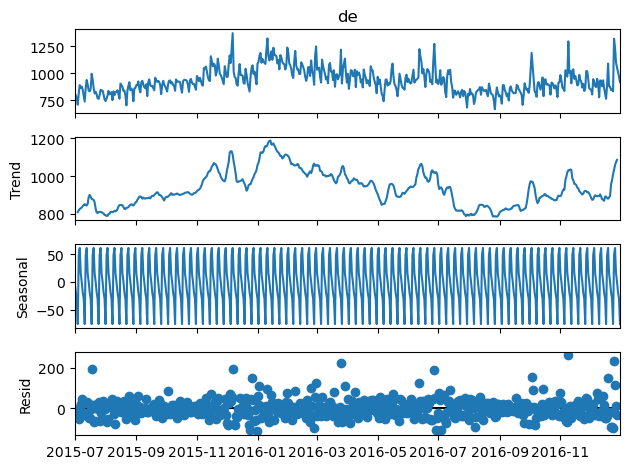

In [70]:
model.plot();

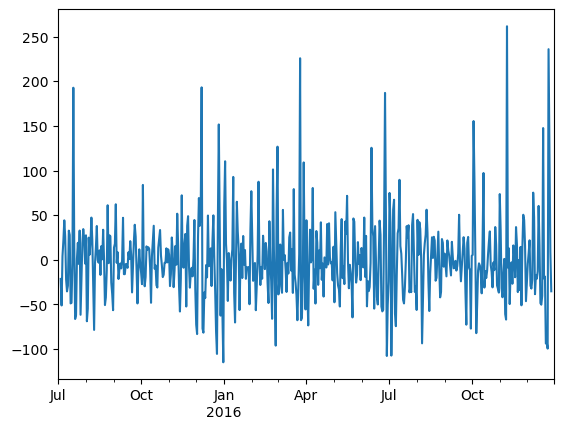

In [71]:
# Residual plot for German Language
model.resid.plot();

#### French Language Web Pages

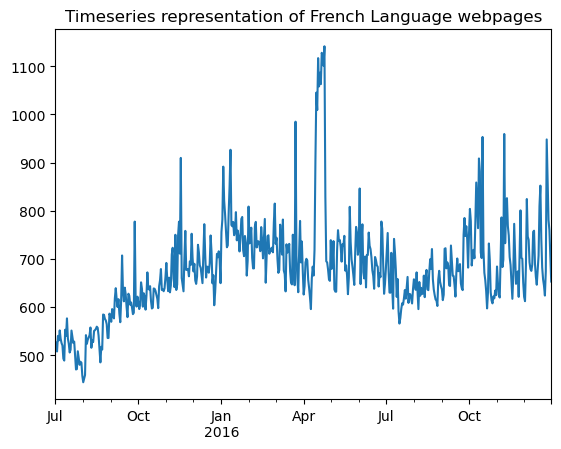

In [72]:
# Plot the data from "French" (fr) Language
plot_langauge_series(df_lang.fr, 'French')

In [73]:
# Check the stationarity of the French language based webpages
print(f"French Timeseries {adf_test(df_lang.fr, "French")}")

French Timeseries French Data is Stationary


    There is no stationarity in the French timeseries data and we cannot clearly identify the trend and seasonality

In [74]:
# Decomposing the components of French in trend and seasonality
model = sm.tsa.seasonal_decompose(df_lang['fr'], model = 'additive')

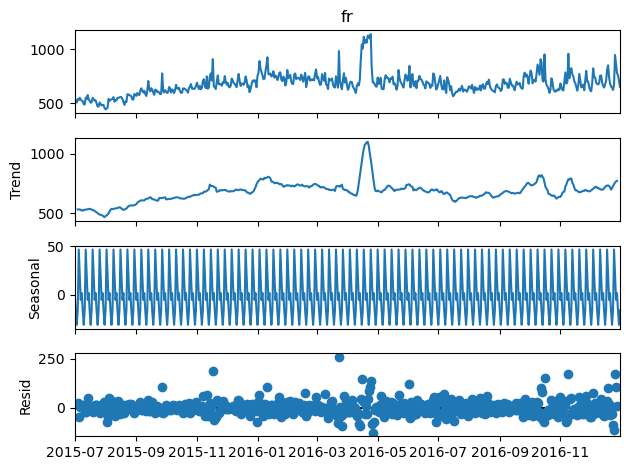

In [75]:
model.plot();

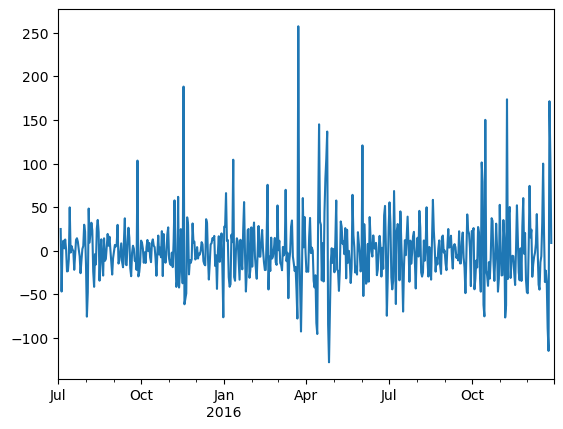

In [76]:
# Residual plot for French Language
model.resid.plot();

#### Spanish Language Web Pages

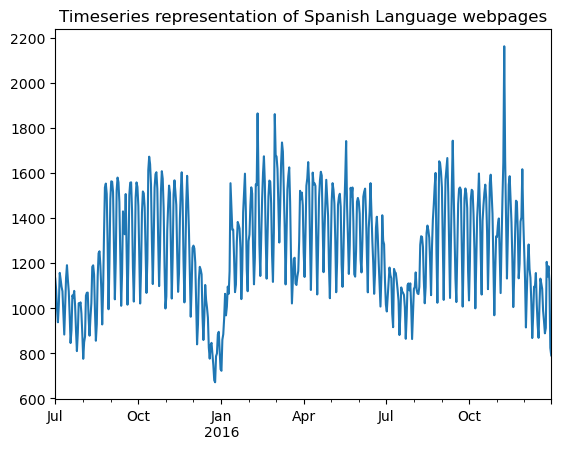

In [77]:
# Plot the data from "SPanish" (es) Language
plot_langauge_series(df_lang.es, 'Spanish')

In [78]:
# Check the stationarity of the SPanish language based webpages
print(f"Spanish Timeseries {adf_test(df_lang.es, "Spanish")}")

Spanish Timeseries Spanish Data is Stationary


    -> There is a no particular trend component present in Spanish language

In [79]:
# Decomposing the components of Spanish in trend and seasonality
model = sm.tsa.seasonal_decompose(df_lang['es'], model = 'additive')

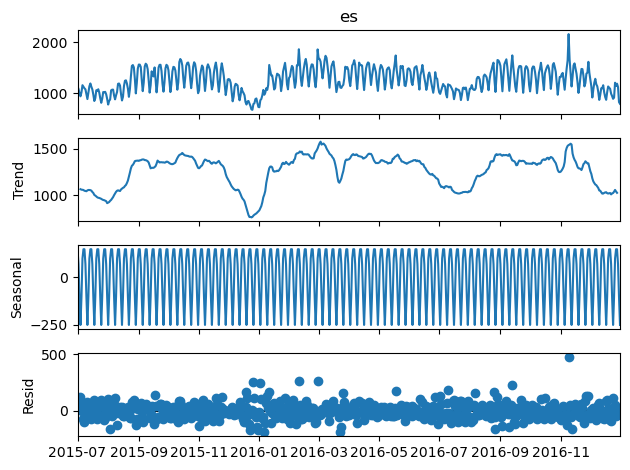

In [80]:
model.plot();

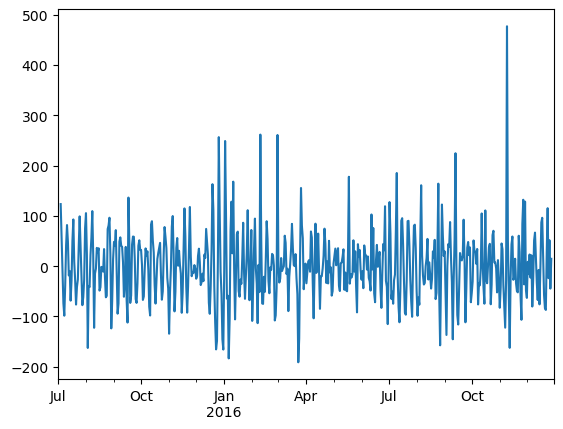

In [81]:
# Residual plot for Spanish Language
model.resid.plot();

#### Russian Language Web Page

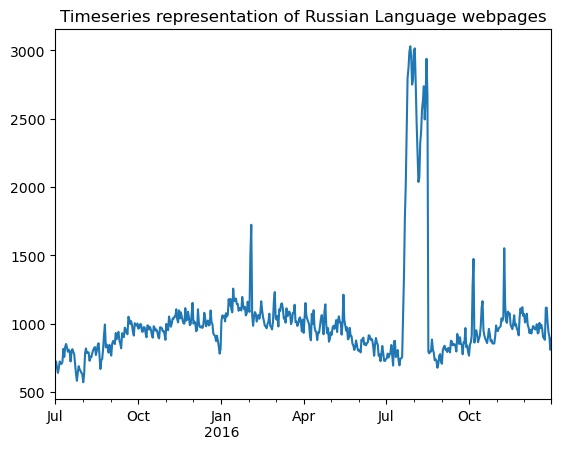

In [82]:
# Plot the data from "Russian" (ru) Language
plot_langauge_series(df_lang.ru, 'Russian')

In [83]:
# Check the stationarity of the Russian language based webpages
print(f"Russian Timeseries {adf_test(df_lang.ru, "Russian")}")

Russian Timeseries Russian Data is Stationary


    -> There is no particular trend in the RUssian language based web-pages

In [84]:
# Decomposing the components of Russian in trend and seasonality
model = sm.tsa.seasonal_decompose(df_lang['ru'], model = 'additive')

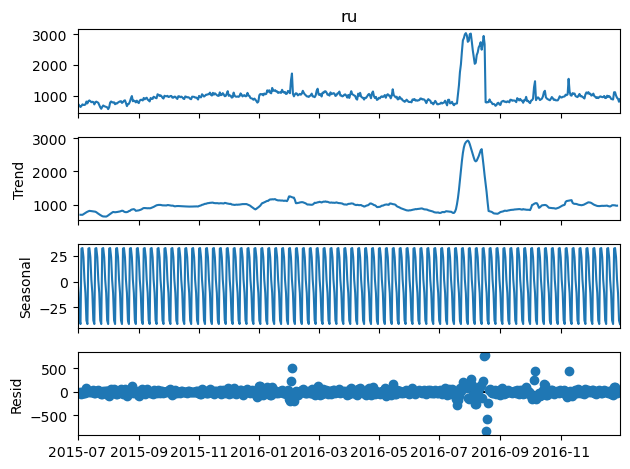

In [85]:
model.plot();

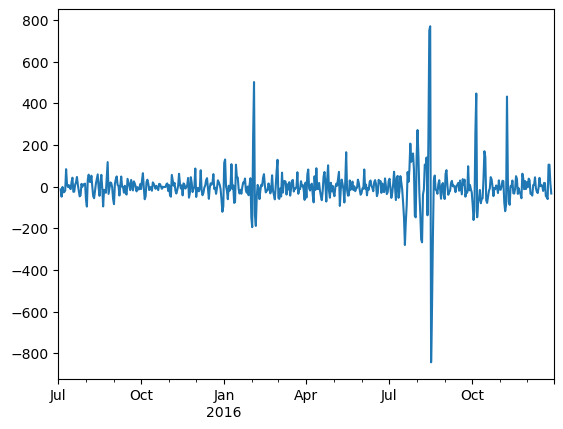

In [86]:
# Residual plot for Russian Language
model.resid.plot();

#### CHinese Language Web Pages

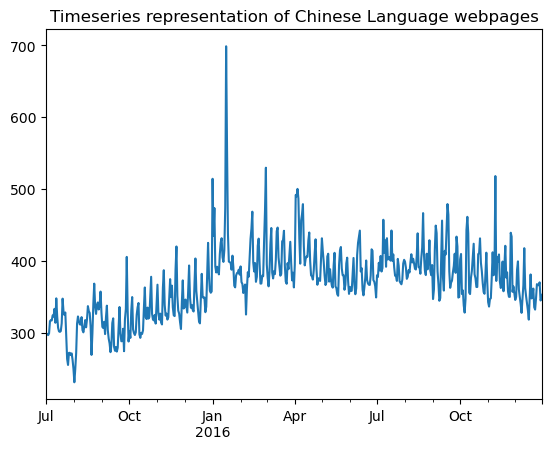

In [87]:
# Plot the data from "Chinese" (zh) Language
plot_langauge_series(df_lang.zh, 'Chinese')

In [88]:
# Check the stationarity of the Chinese language based webpages
print(f"Chinese Timeseries {adf_test(df_lang.zh, "Chinese")}")

Chinese Timeseries ChineseData is not Stationary


    -> There is a rising trend in the Chinese language based webpages and then a down trend

In [89]:
# Decomposing the components of Chinese in trend and seasonality
model = sm.tsa.seasonal_decompose(df_lang['zh'], model = 'additive')

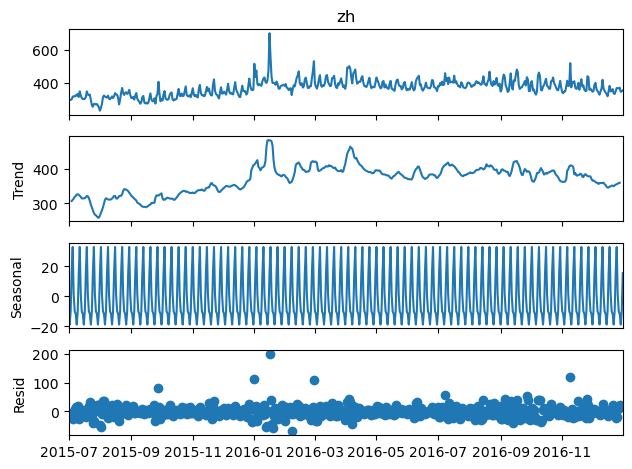

In [90]:
model.plot();

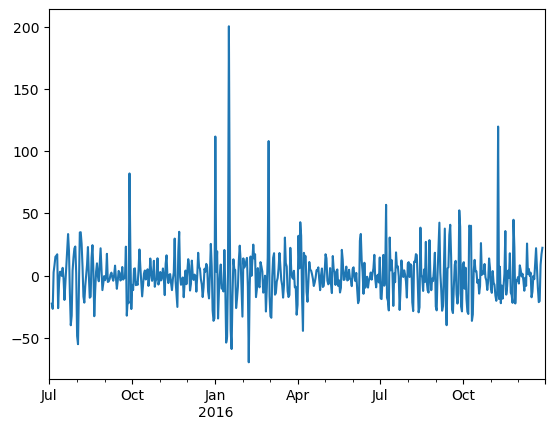

In [91]:
# Residual plot for English Language
model.resid.plot();

    English, Chinese, German, Japanese are Non-Stationary timeseries
    Spanish, French, Russian are Stationary timeseries

In [92]:
df_lang.columns

Index(['de', 'en', 'es', 'fr', 'ja', 'ru', 'zh'], dtype='object', name='Date')

<Axes: >

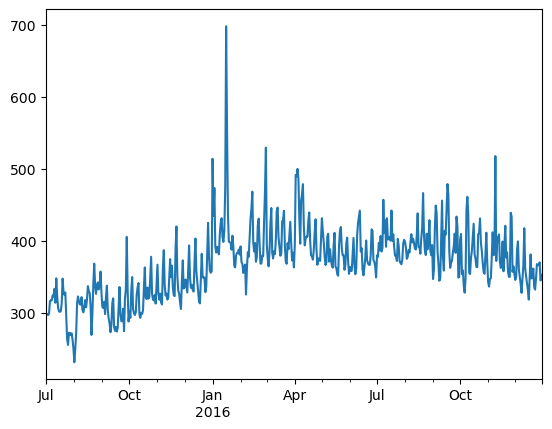

In [93]:
df_lang.zh.plot()

## ACF and PACF plot

In [94]:
# Import library  for the acf and pacf plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [95]:
# Function for plotting the Auto Correlation Plots
def lang_plot_acf(data, language, season = 1):
    # Data before de-trending
    # plot_acf(data, title=f"{language} Autocorrelation - with trend");
    # Data after de-trending
    plot_acf(data.diff().dropna(), title=f"{language} Autocorrelation - De trend");
    # # Data after de-seasoning
    # plot_acf(data.diff().diff(season).dropna(), title=f"{language} Autocorrelation - De Season");
    # # plt.title(f"{language} plot")
    plt.show()

In [96]:
# Function for plotting the Partial Auto Correlation Plots
# PACF is calculated on the original Timeseries
def lang_plot_pacf(data, language, season = 1):
    # Data before de-trending
    plot_pacf(data, title=f"{language} Partial Autocorrelation - Original Timeseries");
    # Data after de-trending
    # plot_acf(data.diff().dropna(), title=f"{language} Partial Autocorrelation - De trend");
    # # Data after de-seasoning
    # plot_acf(data.diff().diff(season).dropna(), title=f"{language} Partial Autocorrelation - De Season");
    # # plt.title(f"{language} plot")
    plt.show()

Before EnglishData is not Stationary


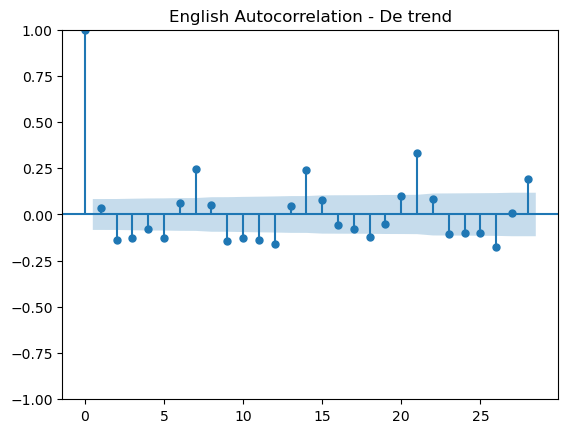

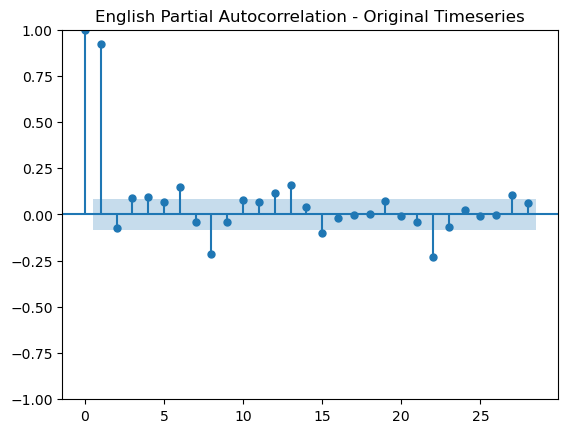

After English Data is Stationary
--*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*--
Before ChineseData is not Stationary


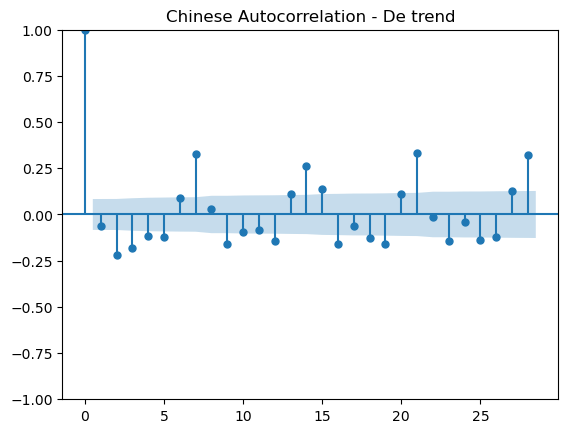

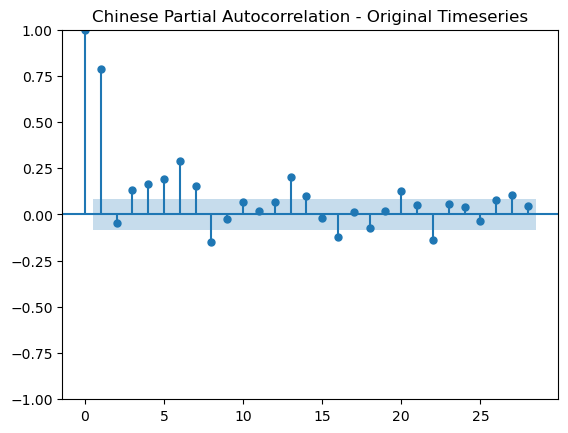

After Chinese Data is Stationary
--*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*--
Before GermanData is not Stationary


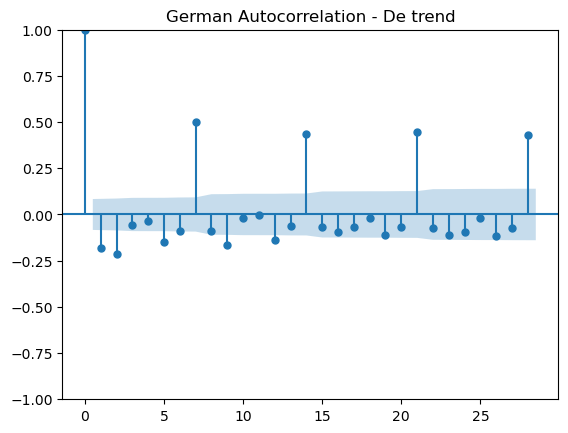

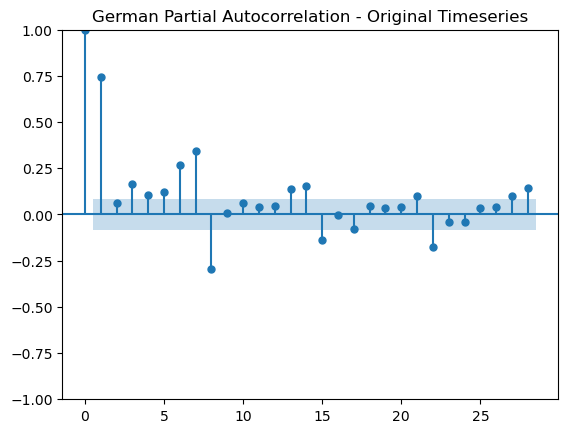

After German Data is Stationary
--*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*--
Before JapaneseData is not Stationary


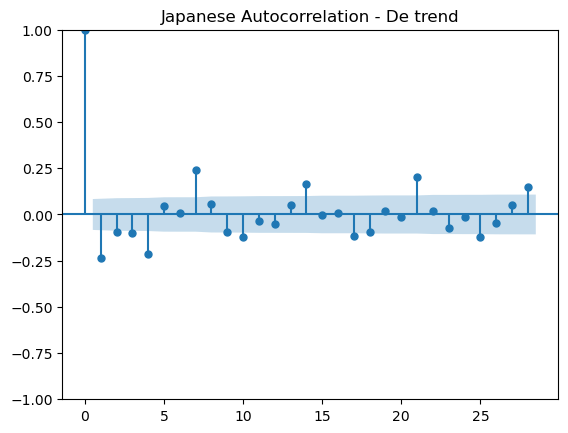

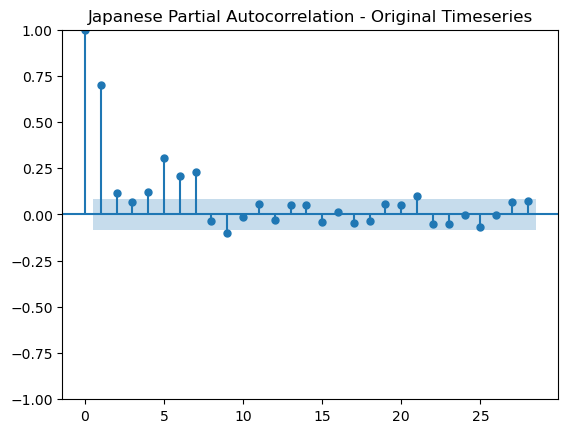

After Japanese Data is Stationary
--*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*--
Before Spanish Data is Stationary


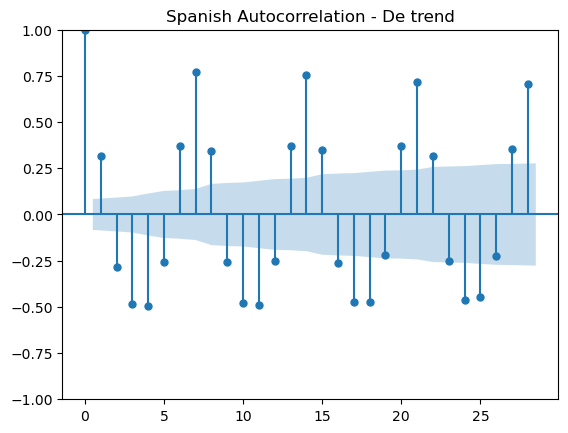

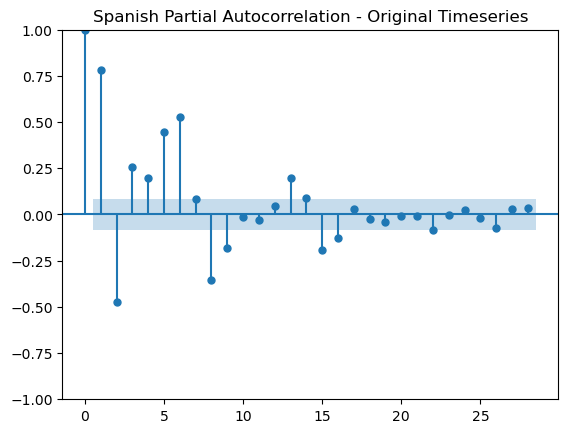

After Spanish Data is Stationary
--*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*--
Before French Data is Stationary


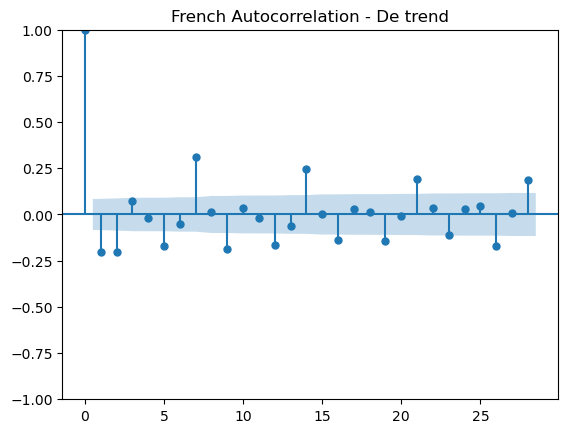

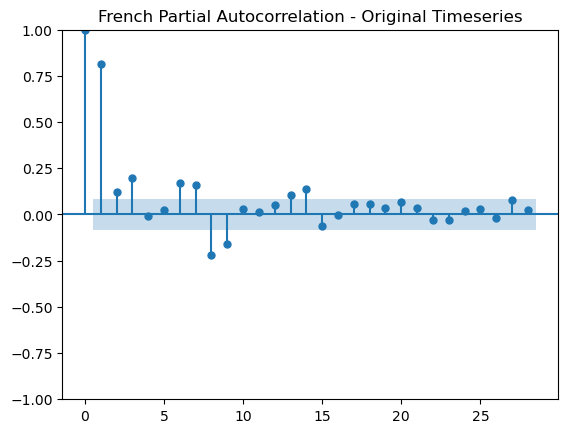

After French Data is Stationary
--*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*--
Before Russian Data is Stationary


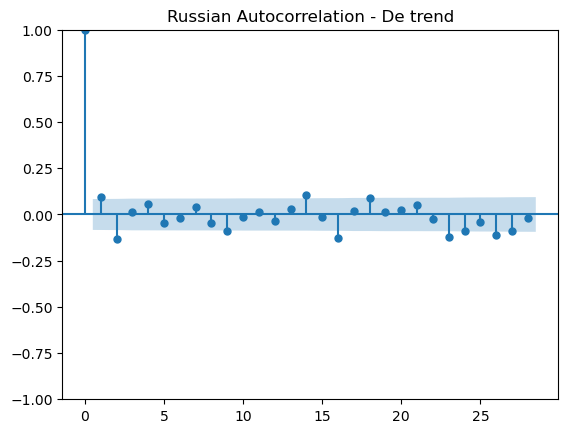

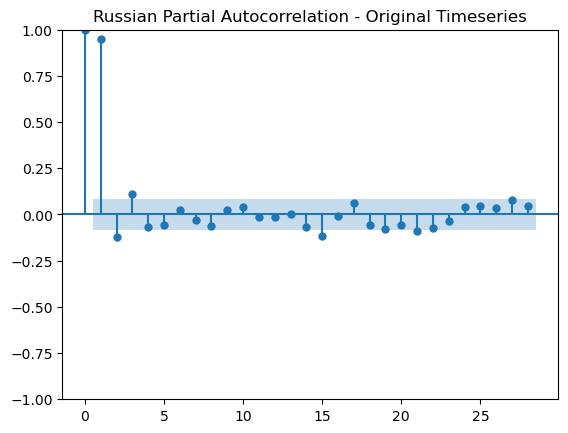

After Russian Data is Stationary
--*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*--


In [97]:
# Get the graphs and the stationarity of the data
# De-trend Plots
lang_corpus = {'en':"English", 'zh':"Chinese", 'de':"German", 'ja':"Japanese", 'es':"Spanish", 'fr':"French", 'ru':"Russian"}

for key, val in lang_corpus.items():
    print(f"Before {adf_test(df_lang[key], val)}")
    # Call the AUtocorrelation plot
    lang_plot_acf(df_lang[key], val)
    # Call the Partial Autocorrealtion plots
    lang_plot_pacf(df_lang[key], val)
    # Print Stationarity
    print(f"After {adf_test(df_lang[key].diff().dropna(), val)}")
    print(f"{'--*--'*20}")

#### Interpretation about the seasonality of the languages, based on the Autocorrelation and Partial Auto-correlation
    -> English, Chinese, German, Japanese, Spanish and French consist for seasonality in their data 
    -> Seasonality period is of 7 days, i.e. weekly seasonality
    -> Russian language sites don't have seasonality and trend, hence Stationary
    -> Partial correlation is strongest at lag 1
    -> Seasonality is at 7

## De-seasoned Plots

In [98]:
# Function for plotting the Auto Correlation Plots
def lang_plot_acf_season(data, language, season = 7):
    # Data before de-trending
    plot_acf(data, title=f"{language} Autocorrelation");
    # Data after de-seasoning
    plot_acf(data.diff().diff(season).dropna(), title=f"{language} Autocorrelation - De Season");
    # # plt.title(f"{language} plot")
    plt.show()

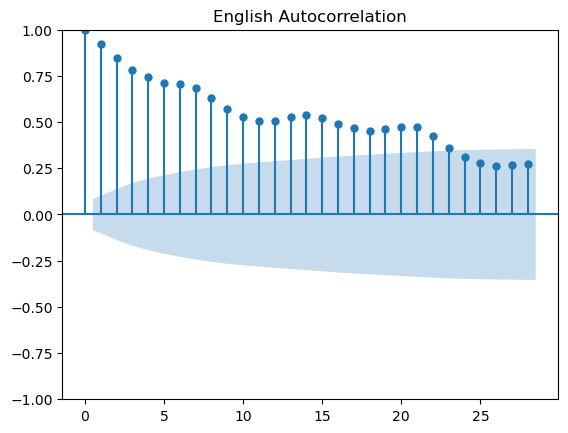

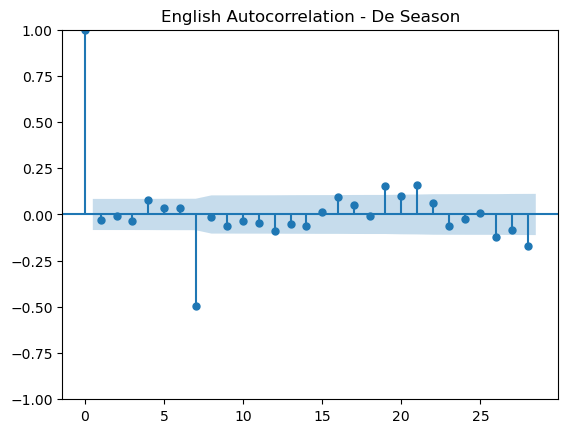

English Data is Stationary
--*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*--


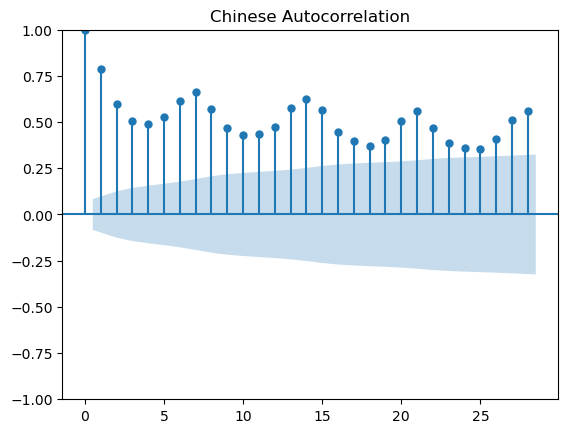

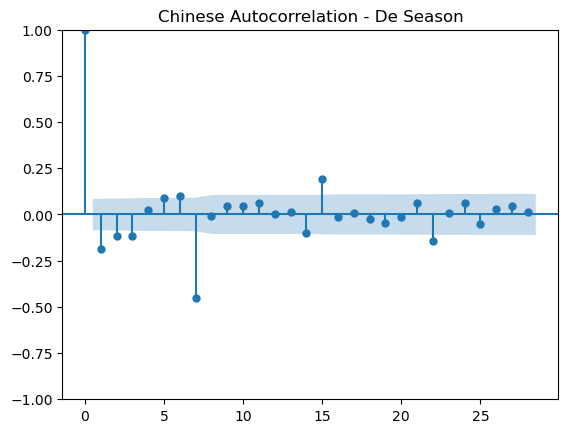

Chinese Data is Stationary
--*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*--


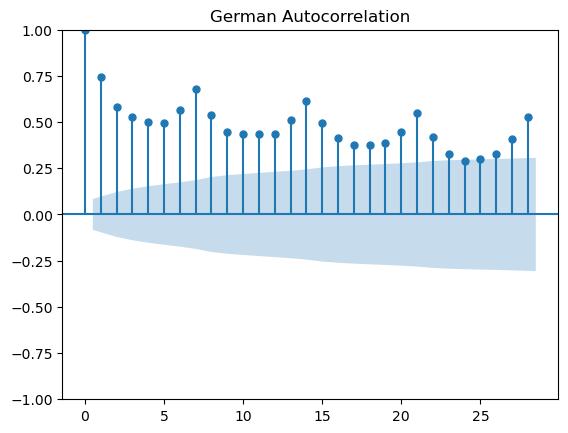

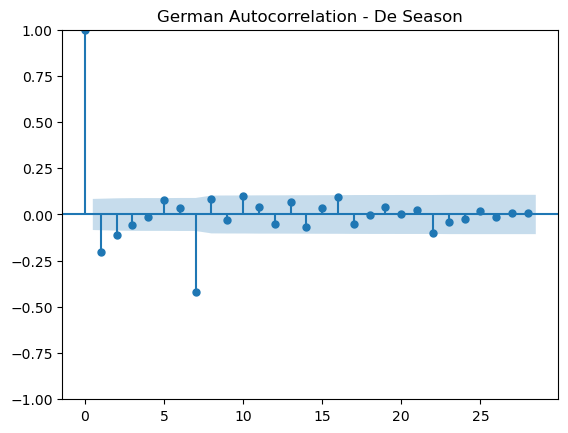

German Data is Stationary
--*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*--


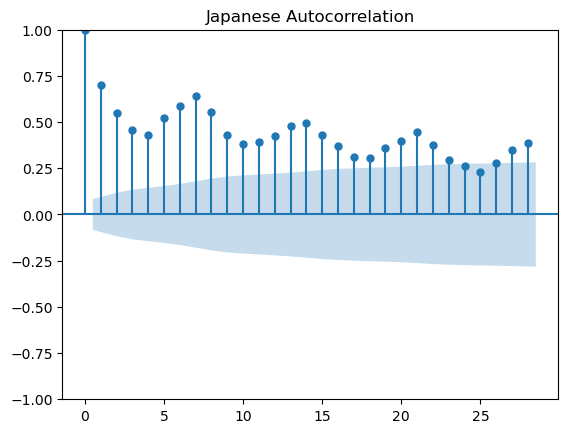

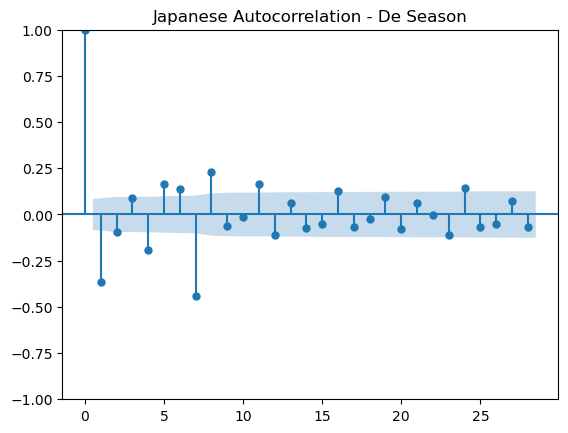

Japanese Data is Stationary
--*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*--


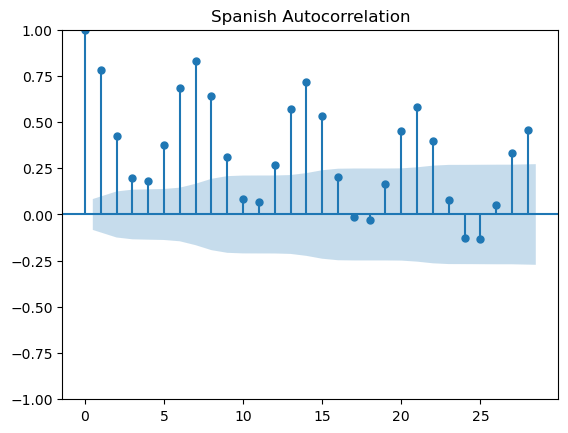

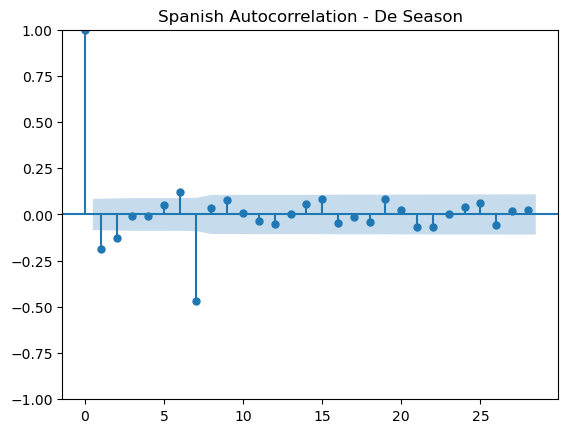

Spanish Data is Stationary
--*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*--


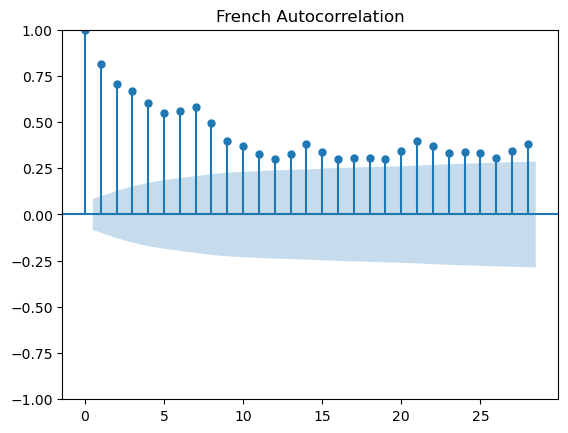

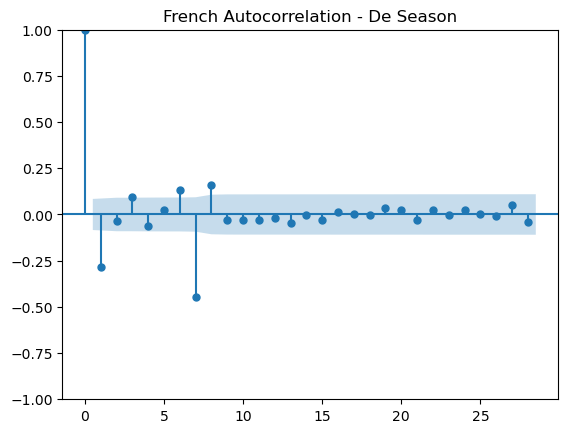

French Data is Stationary
--*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*--


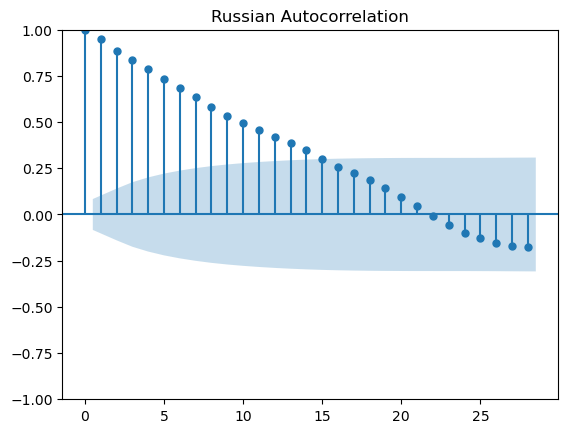

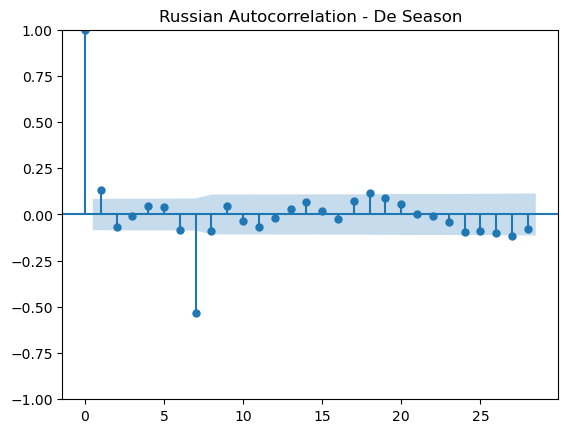

Russian Data is Stationary
--*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*----*--


In [99]:
# De-seasoned Plots

for key, val in lang_corpus.items():
    # Call the AUtocorrelation plot
    lang_plot_acf_season(df_lang[key], val)
    # # Call the Partial Autocorrealtion plots
    # lang_plot_pacf_season(df_lang[key], val)
    # Print Stationarity
    print(f"{adf_test(df_lang[key].diff().diff(7).dropna(), val)}")
    print(f"{'--*--'*20}")

#### Observations from the ACF and PACF after de-seasoning
    -> After de-seasoning there doesn't exist any trend and seasonality in the series
    -> There doesn't exist any strong correlation between the lags after de-seasoning

## Model Building and Evaluation

### Train Test Split

In [100]:
# We are considering 21 data-points in test set

train_x = df_lang.loc[df_lang.index < df_lang.index[-21]].copy()
test_x = df_lang.loc[df_lang.index >= df_lang.index[-21]].copy()

test_x

Date,de,en,es,fr,ja,ru,zh
2016-12-11,933.57,4941.07,965.82,756.28,870.52,983.61,417.59
2016-12-12,930.91,5108.09,1095.61,758.58,794.84,974.21,362.27
2016-12-13,879.12,4863.72,1096.11,690.79,761.56,958.48,350.73
2016-12-14,935.07,5101.87,1155.95,662.85,830.75,960.41,340.87
2016-12-15,865.47,4642.24,1016.53,646.37,700.11,996.47,331.09
2016-12-16,811.61,4384.20,924.56,676.92,688.95,929.39,318.17
2016-12-17,764.53,4380.12,868.58,706.57,783.73,934.99,347.99
2016-12-18,890.72,5056.61,1016.10,809.74,951.13,1006.00,381.03
2016-12-19,1088.66,5498.35,1131.04,852.21,799.32,968.35,347.65
2016-12-20,880.10,5396.90,1109.86,743.00,803.47,992.78,351.22


In [101]:
# Stationary Data
train_x_st = train_x.copy()
train_x_st = train_x_st.diff(1)
train_x_st.dropna(inplace=True)

In [102]:
# Check for the Stationarity of the data
for i in range(train_x_st.shape[1]):
    print(adf_test(train_x_st.iloc[::,i], train_x_st.iloc[::,i].name))

de Data is Stationary
en Data is Stationary
es Data is Stationary
fr Data is Stationary
ja Data is Stationary
ru Data is Stationary
zh Data is Stationary


In [103]:
# Function to estimate performance of different models
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

### ARIMA Model

In [104]:
import warnings

# Ignore specific warning
warnings.filterwarnings("ignore", category=Warning)

In [105]:
# Import the ARIMA Models package
import statsmodels as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

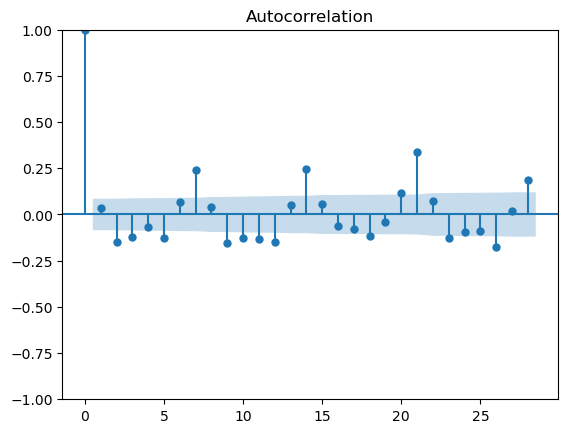

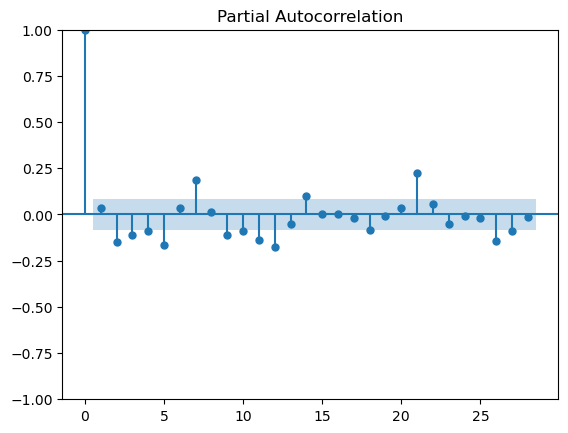

In [106]:
plot_acf(train_x_st.en);
plot_pacf(train_x_st.en);

In [107]:
model = SARIMAX(train_x_st.en, order=(1, 0, 0))
model = model.fit(disp=False)
test_x[f'{"en"}_pred'] = model.forecast(steps=21)

In [109]:
# Integrate !!
test_x['en_pred'] = (test_x['en_pred'].cumsum() + train_x.en.iloc[-1]).round(2)

MAE : 522.4
RMSE : 676.547
MAPE: 0.094


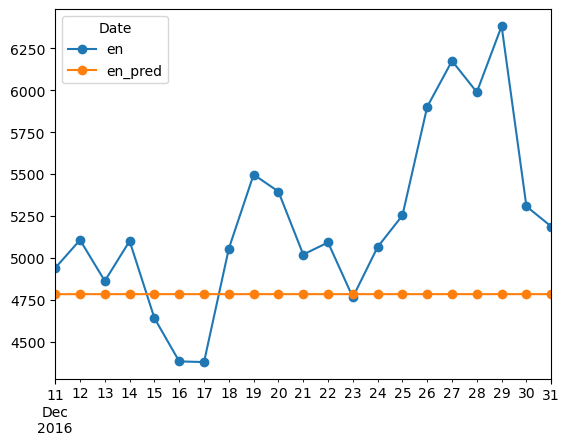

In [110]:
test_x[['en', 'en_pred']].plot(style='-o')
performance(test_x['en'], test_x['en_pred'])

In [111]:
import itertools

In [112]:
# Creating a function to print values of all these metrics.
def mape_performance(actual, predicted):
    return round(mape(actual, predicted), 3)

In [113]:
# Define parameter grid
p = range(5)  # AR component
d = range(4)  # Differencing
q = range(4)  # MA component
P = range(2)  # Seasonal AR component
D = range(2)  # Seasonal differencing
Q = range(2)  # Seasonal MA component
s = [7]      # Seasonal period

# Create parameter grid
param_grid = list(itertools.product(p, d, q, P, D, Q, s))

print(len(param_grid))

# Define evaluation metric
def evaluate_model(train_data, param):
    model = SARIMAX(train_data, order=(param[0], param[1], param[2]), seasonal_order=(param[3], param[4], param[5], param[6]))
    model = model.fit(disp=False)
    test_x[f"{train_data.name}_pred"] = model.forecast(steps=21)
    test_x[f"{train_data.name}_pred"] = (test_x[f"{train_data.name}_pred"].cumsum() + train_x[f"{train_data.name}"].iloc[-1]).round(2)
    # print(train_data.name)
    return mape_performance(test_x[train_data.name], test_x[f"{train_data.name}_pred"])

640


In [ ]:
# Time Taking
# print(param_grid)
# Perform grid search
best_mape = float('inf')
best_params = None
for param in param_grid:
    try:
        mape_val = evaluate_model(train_x_st.en, param)
        # print(mape_val)
        if mape_val < best_mape:
            best_mape = mape_val
            best_params = param
    except:
        continue

print("Best Mape:", best_mape)
print("Best Parameters:", best_params)


In [ ]:
# Fit final model with best parameters
final_model = sm.tsa.SARIMAX(train_x_st, order=(best_params[0], best_params[1], best_params[2]), seasonal_order=(best_params[3], best_params[4], best_params[5], best_params[6]))
final_results = final_model.fit()
print(final_results.summary())

MAE : 297.597
RMSE : 415.515
MAPE: 0.055


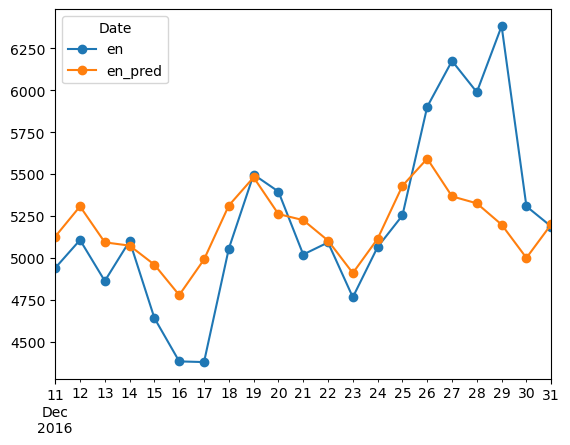

In [124]:
model = SARIMAX(train_x_st.en, order=(4, 0, 2), seasonal_order=(1,1,1,7))
model = model.fit(disp=False)
test_x['en_pred'] = model.forecast(steps=21)
test_x['en_pred'] = (test_x['en_pred'].cumsum() + train_x.en.iloc[-1]).round(2)
test_x[['en', 'en_pred']].plot(style='-o')
performance(test_x['en'], test_x['en_pred'])

In [149]:
# Exogenous Variable
exog_var = pd.read_csv("Dataset/Exog_Campaign_eng")

In [153]:
exog_var.index = df_lang.index

In [155]:
df_lang['exog'] = exog_var.Exog

In [156]:
df_lang.head()

Date,de,en,es,fr,ja,ru,zh,exog
2015-07-01,807.73,3894.56,1131.52,523.33,627.87,713.36,297.96,0
2015-07-02,797.64,3882.84,1082.38,526.45,716.97,724.50,298.33,0
2015-07-03,768.21,3700.32,997.27,507.68,650.27,676.59,296.61,0
2015-07-04,710.38,3841.15,937.62,539.93,810.02,640.51,299.03,0
2015-07-05,815.11,3958.04,1017.68,530.78,778.11,677.35,316.01,0


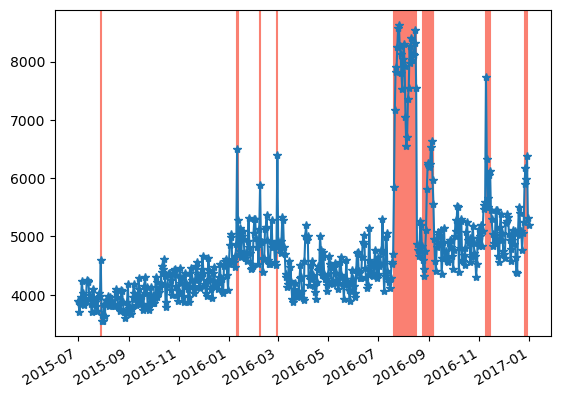

In [158]:
# Lets take a look at our time series plot
campaign = exog_var.loc[exog_var.Exog==1].index
for camp in campaign:
    plt.axvline(x=camp, color='#FA8072')
df_lang.en.plot(style='-*')
plt.show()

#### The add campaign for english websites was run at max from 2016 August to Spetember

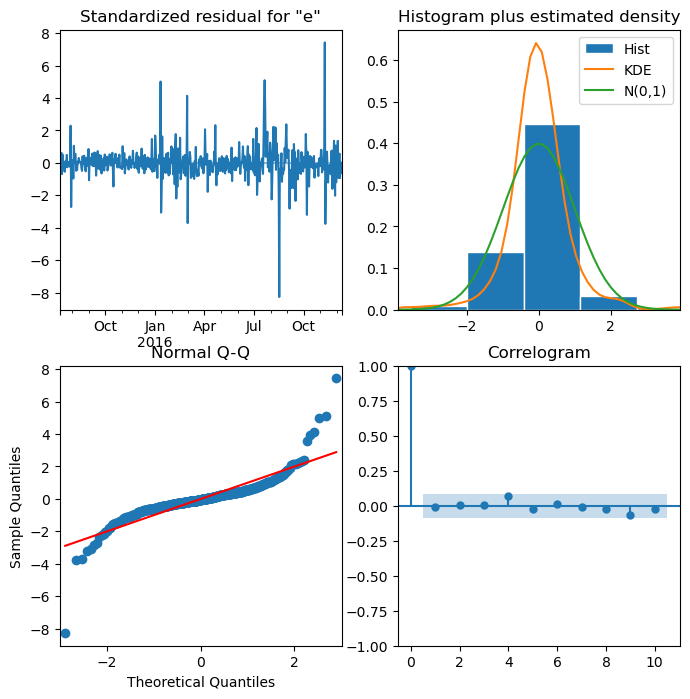

In [159]:
model.plot_diagnostics(figsize=(8,8));

## SARIMAX  on Exogeneous

In [144]:
exog_var.index = range(len(df_lang))

In [160]:
# Obtain predicted values
start=len(train_x)
end=len(train_x)+len(test_x)-1
predictions = model.predict(start=start, end=end)

In [161]:
start, end

(529, 549)

In [162]:
train_x.shape

(529, 7)

In [165]:
model = SARIMAX(train_x['en'],exog=exog_var['Exog'].loc[train_x['en'].index],order=(4,0,3),seasonal_order=(1,1,1,7),enforce_invertibility=False)
results = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.34950D+02    |proj g|=  8.71268D+04

At iterate    5    f=  7.40178D+00    |proj g|=  1.74571D-01

At iterate   10    f=  7.11120D+00    |proj g|=  2.09034D-01

At iterate   15    f=  7.07404D+00    |proj g|=  7.40490D-02

At iterate   20    f=  7.04533D+00    |proj g|=  1.55220D-01

At iterate   25    f=  7.04145D+00    |proj g|=  2.97496D-02

At iterate   30    f=  7.02222D+00    |proj g|=  1.24011D-01

At iterate   35    f=  7.01877D+00    |proj g|=  1.58418D-02

At iterate   40    f=  7.01616D+00    |proj g|=  3.12005D-03

At iterate   45    f=  7.01595D+00    |proj g|=  1.42368D-02

At iterate   50    f=  7.01531D+00    |proj g|=  9.94599D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [166]:
exog_forecast = exog_var['Exog'].loc[test_x['en'].index]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('Predictions')

MAE : 282.551
RMSE : 354.9
MAPE: 0.053


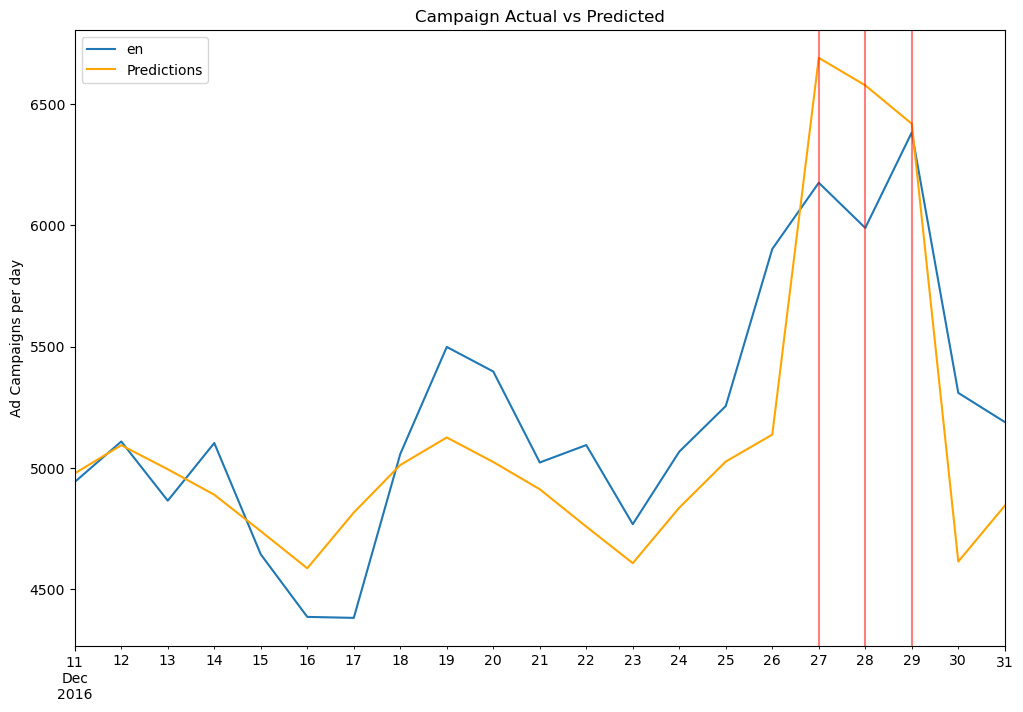

In [169]:
performance(test_x['en'], predictions)
# Plot predictions against known values
title='Campaign Actual vs Predicted'
ylabel='Ad Campaigns per day'
xlabel=''

ax = test_x['en'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True, color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in exog_var.loc[test_x['en'].index].query('Exog==1').index:
    ax.axvline(x=x, color='red', alpha = 0.5);

## Facebook Prophet

In [171]:
df_lang.reset_index()

Date,index,de,en,es,fr,ja,ru,zh,exog
0,2015-07-01,807.73,3894.56,1131.52,523.33,627.87,713.36,297.96,0
1,2015-07-02,797.64,3882.84,1082.38,526.45,716.97,724.50,298.33,0
2,2015-07-03,768.21,3700.32,997.27,507.68,650.27,676.59,296.61,0
3,2015-07-04,710.38,3841.15,937.62,539.93,810.02,640.51,299.03,0
4,2015-07-05,815.11,3958.04,1017.68,530.78,778.11,677.35,316.01,0
...,...,...,...,...,...,...,...,...,...
545,2016-12-27,1098.36,6175.98,1140.83,867.84,806.75,1008.88,365.95,1
546,2016-12-28,1051.35,5989.52,1186.05,781.10,808.05,938.20,370.08,1
547,2016-12-29,1013.67,6383.59,1119.50,759.44,886.32,904.34,344.77,1
548,2016-12-30,968.51,5308.78,823.97,707.85,976.21,809.93,348.14,0


In [181]:
# Dataframe
df_fb = df_lang.reset_index().copy()
df_fb['ds'] = pd.to_datetime(df_fb['index'])
df_fb['y'] = df_fb['en']
df_fb['Ad_camp'] = df_fb['exog']
df_fb = df_fb[['ds','y', 'Ad_camp']]

In [182]:
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ds       550 non-null    datetime64[ns]
 1   y        550 non-null    float64       
 2   Ad_camp  550 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 13.0 KB


In [178]:
from prophet import Prophet

00:17:06 - cmdstanpy - INFO - Chain [1] start processing
00:17:06 - cmdstanpy - INFO - Chain [1] done processing


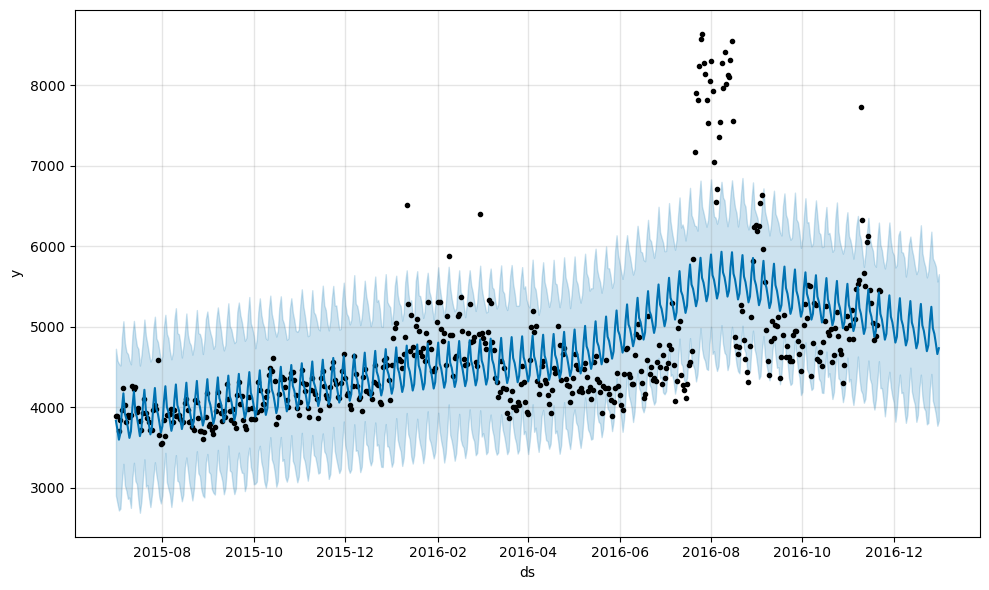

In [183]:
m = Prophet()
m.fit(df_fb[['ds', 'y']][:-39]) #here we are leaving last 39 observations because we will predict it in 'future'
future = m.make_future_dataframe(periods=39,freq="D")
forecast = m.predict(future)
fig = m.plot(forecast)

In [184]:
# In the plot, black dots are actual visits, deep blue lines are the predicted visits and light blue lines is the 95% confidence interval around the prediction.

In [185]:
forecast.tail(4)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
546,2016-12-28,4911.010085,4004.781709,5804.803831,4866.483972,4959.422259,-0.540785,-0.540785,-0.540785,-0.540785,-0.540785,-0.540785,0.0,0.0,0.0,4910.469301
547,2016-12-29,4905.909623,3909.693831,5747.630938,4858.211467,4957.263111,-114.208473,-114.208473,-114.208473,-114.208473,-114.208473,-114.208473,0.0,0.0,0.0,4791.701150
548,2016-12-30,4900.809162,3767.652513,5561.307378,4851.358883,4954.433905,-242.091022,-242.091022,-242.091022,-242.091022,-242.091022,-242.091022,0.0,0.0,0.0,4658.718140
549,2016-12-31,4895.708700,3834.251963,5652.343712,4844.434683,4951.743338,-164.443328,-164.443328,-164.443328,-164.443328,-164.443328,-164.443328,0.0,0.0,0.0,4731.265371


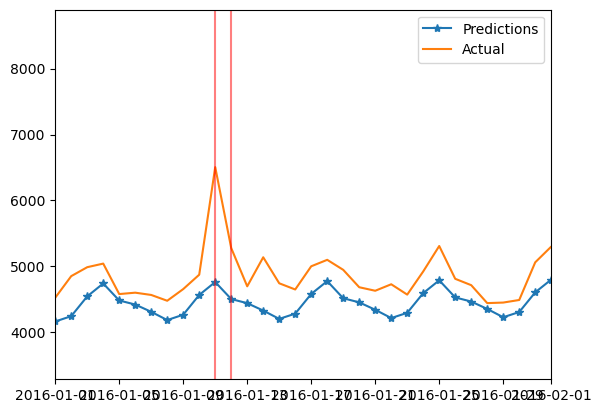

In [190]:
plt.plot(forecast['ds'], forecast['yhat'],'-*', label = 'Predictions')
plt.plot(df_fb['ds'], df_fb['y'], label = 'Actual')
for x in df_fb.query('Ad_camp==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2016-02-01'))
plt.legend()

In [191]:
performance(df_fb['y'][:-39],forecast['yhat'][:-39])

MAE : 454.734
RMSE : 702.861
MAPE: 0.087


00:22:09 - cmdstanpy - INFO - Chain [1] start processing
00:22:09 - cmdstanpy - INFO - Chain [1] done processing


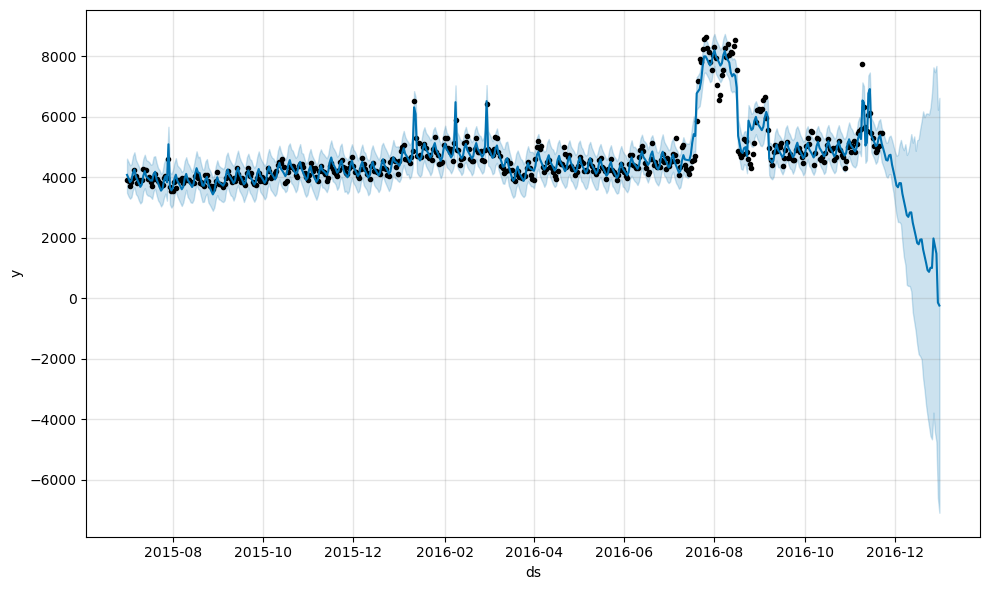

In [192]:
model2=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,
               changepoint_prior_scale=4)
model2.add_regressor('Ad_camp') #adding holidays data in the model3
model2.fit(df_fb[:-39])
forecast2 = model2.predict(df_fb)
fig = model2.plot(forecast2)

In [193]:
performance(df_fb['y'][:-39],forecast2['yhat'][:-39])

MAE : 185.599
RMSE : 283.964
MAPE: 0.038


-> All the metrics have improved from the last model which wasn't using the Ad_camp feature.

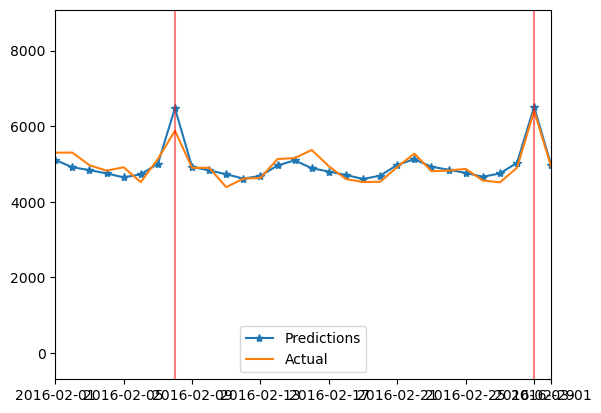

In [194]:
plt.plot(forecast2['ds'], forecast2['yhat'],'-*', label = 'Predictions')
plt.plot(df_fb['ds'], df_fb['y'], label = 'Actual')
plt.xlim(pd.to_datetime('2016-02-01'), pd.to_datetime('2016-03-01'))
for x in df_fb.query('Ad_camp==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.legend()

00:25:08 - cmdstanpy - INFO - Chain [1] start processing
00:25:08 - cmdstanpy - INFO - Chain [1] done processing


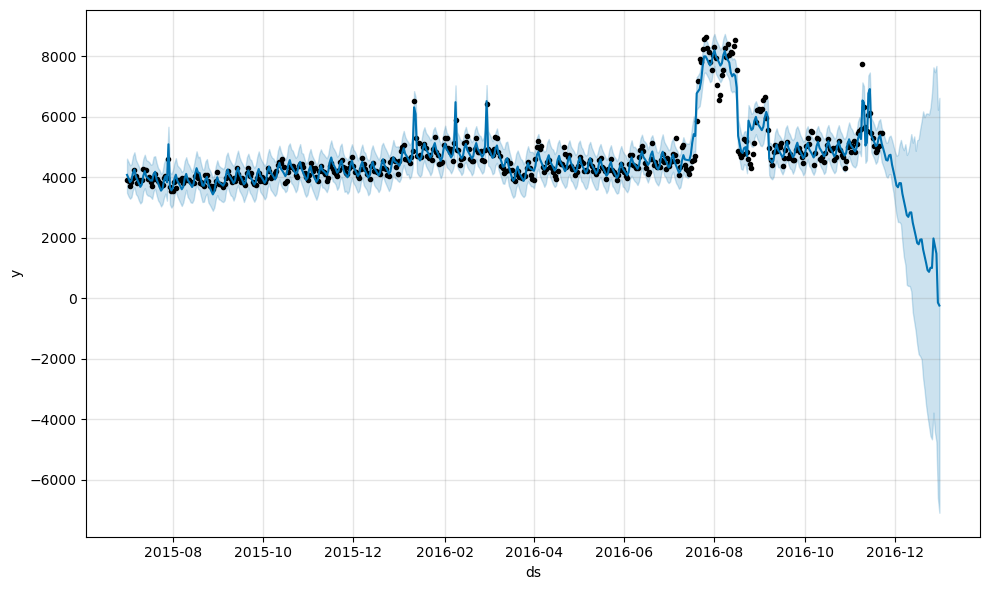

In [195]:
model3=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,
               changepoint_prior_scale=4)
model3.add_country_holidays(country_name='US') #adding holidays data in the model2
model3.fit(df_fb[:-39])
future = m.make_future_dataframe(periods=39,freq="D")
forecast3 = model3.predict(df_fb)
fig = model3.plot(forecast2)

In [196]:
performance(df_fb['y'][:-39],forecast3['yhat'][:-39])

MAE : 228.856
RMSE : 366.514
MAPE: 0.046


-> Performance decreased

In [198]:
df_lang.sum().sort_values()

Date
exog         54.00
zh       203061.20
fr       373117.67
ja       439276.15
de       512988.73
ru       559748.43
es       693219.09
en      2583207.69
dtype: float64